# Problem 1

Given the following data:

```python
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50], 'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)
```

Solve the problem of predicting student test results from study hours with linear regression using numpy.polyfit() with a degree=1, fitting a line.

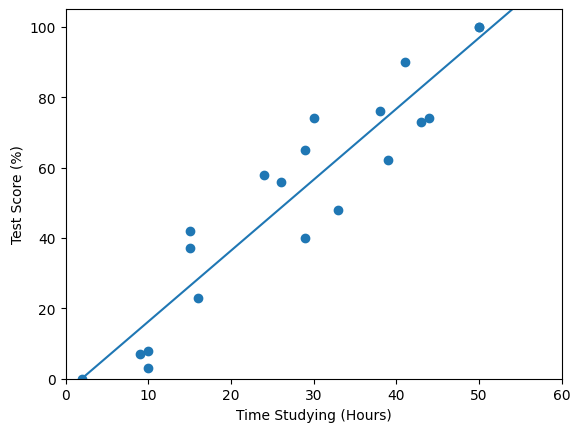

In [7]:
# Problem 1 Solution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50], 'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}
student_data = pd.DataFrame(data=students)

# Find best fit polynomial
degree = 1
polynomial = np.polyfit(students['hours'], students['test_results'], degree)

# Data for plotting the line
x_vals = np.linspace(0, 60, 100)
y_vals = np.polyval(polynomial, x_vals)

# Plot The data
plt.xlabel('Time Studying (Hours)')
plt.ylabel('Test Score (%)')

plt.xlim(0, 60)
plt.ylim(0, 105)

plt.plot(x_vals, y_vals)
plt.scatter(student_data['hours'], student_data['test_results'])
plt.show()


# Problem 2

Given the data in `houses.csv`, grnerate a linear regression model for the price of a house in terms of the square footage and the number of bedrooms using `np.linalg.lstsq`

Estimated price for a 2000 sq. ft. home with 3 bedrooms is $295291.75.


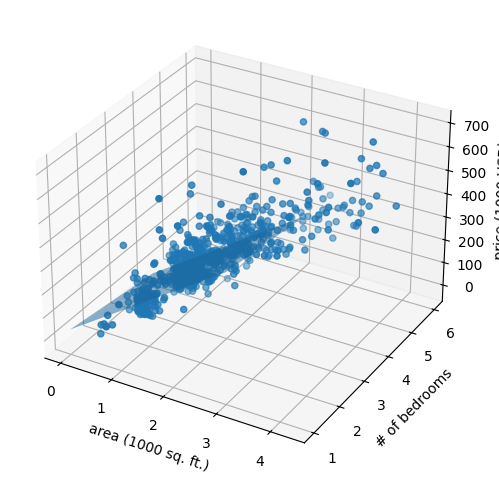

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# os.cwd() workaround for incorrect path resolution with relative paths
# load data from the csv file
data = pd.read_csv(os.getcwd() + "/data/houses.csv")
# print(data)

# find least squares solution using np.lstsq
coefficient_matrix = np.column_stack((data['area'], data['beds'], np.ones(len(data))))
regression = np.linalg.lstsq(coefficient_matrix, data['price'], rcond=-1)[0]
# print(regression)

# define the regression function for any value given the coefficients from the least squares solution
regression_func = lambda area, bedrooms: regression[0] * area + regression[1] * bedrooms + regression[2]

# Set up axes
fg = plt.figure(figsize=(6, 6))
ax = fg.add_subplot(projection='3d')

# Set Labels
ax.set_xlabel("area (1000 sq. ft.)")
ax.set_ylabel("# of bedrooms")
ax.set_zlabel("price (1000 USD)")

# Scatter plot for the real data points
ax.scatter(data['area'], data['beds'], data['price'])

# Set up and plot the least squares best-fit plane using the regression function
x_values, y_values = np.meshgrid(range(4), range(1, 5))
z_values = regression_func(x_values, y_values)

# Use alpha of 0.5 so it doesn't look so bad
ax.plot_surface(x_values, y_values, z_values, alpha=0.5)

# Calculate for 2000 sq.ft and 3 bedrooms using the regression function. Expected result: $297,447
# Area is varied by a factor of 1000 for unit conversion, same for final price
sqft = 2000
bedrooms = 3
extrapolated_price = regression_func(sqft / 1000, bedrooms) * 1000
print(f"Estimated price for a {sqft} sq. ft. home with {bedrooms} bedrooms is ${extrapolated_price:.2f}.")
